<a href="https://colab.research.google.com/github/Tender-sun/ML/blob/main/%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第一题

#### 1.1A）写一个简单的程序计算损失函数相对于权重向量的梯度

In [115]:
def hinge_loss_grad(x,y,a):
  return np.where(y*a>1,0,-y*x)

#### 1.2A）sigmoid函数相对于输入的导数

答案：$sigmoid导数为\frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}})$

#### 1.2B）o=sigmoid

答案：$O(1-O)$

#### 1.2C）y=0时候，P(a,y)的值是多少？

答案：$y=0时候，P(a,y)=(1-a)$

#### 1.2D)y=1时候的P(a,y)的值为多少？

答案：$y=1时，P(a,y)=a$

#### 1.2E))为找到不使用幂运算P(a,y)的简化表达式。n为找到一个不使用幂运算的简化表达式。请注意，我们在整个作业中提到自然对数，与课堂讲稿一致。


答案：使用负对数似然函数
$$NLL=ylog(a)+(1-y)log(1-a)$$

In [78]:
print('y*log(a)+(1-y)*log(1-a)')

y*log(a)+(1-y)*log(1-a)


#### 1.2.F)针对单个训练示例，为NLL相对于第一个权重的梯度$\nabla_(w_1^L)NL(a_1^L,y)$写一个公式。提示:考虑使用链式规则；最后的答案(表达)很短。

答案：$x_1(a_1-y)$

In [79]:
print('x1*(a1-y)')

x1*(a1-y)


#### 1.2G)针对单个训练示例，为NLL相对于全权重向量的梯度写一个公式。


答案：$x(a_1-y)$

In [81]:
print('(a_1-y)*x')

(a_1-y)*x


## 第二题：多类分类

#### 2.A) $z^L=[-1,0,1]^T$表示类别的概率分布是什么

In [77]:
import numpy as np
def SM(Z):
  e = np.exp(Z)
  return e/np.sum(e)
def RELU(Z):
  Z=np.max(0,Z)
  return Z
zl=[-1,0,1]
zl_l = SM(zl)
zl_l

array([0.09003057, 0.24472847, 0.66524096])

答案： [0.09003057, 0.24472847, 0.66524096]

#### 2.B)如果$𝑎 = [.3, .5, .2]^T$且$y=[0,0,1]^T$ ,那么NLL(a,y)是多少？

答案：$-(log(0.7)+log(0.5)+log(0.2))=-log(0.07)$

#### 2.C)假设我们有两个输入单位和三个可能的输出值，权重矩阵$W^T$为

答案：实现代码如下

In [92]:
w = np.array([[1,-1,-2],[-1,2,1]])
x = np.array([[1,1]])
y = np.array([0,1,0])
z = np.dot(x,w)
a = SM(z)
res = np.dot(x.T,(a-y))
res2 = np.round(res,3)
res2

array([[ 0.245, -0.335,  0.09 ],
       [ 0.245, -0.335,  0.09 ]])

#### 2.D)在任何梯度更新之前，1类中的预测概率是多少？(假设我们有类0、1和2。)

答案：

In [96]:
print(a) #a=SM(np.dot(x,w))

[[0.24472847 0.66524096 0.09003057]]


#### 2.E使用步长0.5，一个梯度更新步骤后$W^T$是多少？

答案：array([[ 0.87763576, -0.83262048, -2.04501529],
       [-1.12236424,  2.16737952,  0.95498471]]),代码如下

In [97]:
w_new = w-0.5*res
w_new

array([[ 0.87763576, -0.83262048, -2.04501529],
       [-1.12236424,  2.16737952,  0.95498471]])

#### 2.F给定新的权重矩阵，x在1类中的预测概率是多少？

答案：

In [99]:
p_new = SM(np.dot(x,w_new))
p_new

array([[0.15918761, 0.77245284, 0.06835955]])

## 第三题：神经网络

#### 3.1A)输出：我们考虑$x_1=3,x2=14$,求隐藏单元的输出结果$(f^1(z_1^1),f^1(z_2^1),f^1(z_3^1),f^1(z_4^1)$

In [38]:
def relu(x):
    return np.maximum(0, x)
X=np.array([3,14])
W1=np.array([[1,0,-1,0],[0,1,0,-1]])
W0=np.array([[-1,-1,-1,-1]])
W2=np.array([[1,-1],[1,-1],[1,-1],[1,-1]])
W20=np.array([[0],[2]])
Z1 = np.dot(X.T,W1)+W0
A1 =relu(Z1)
print('激活前',Z1,"激活后",A1)


激活前 [[  2  13  -4 -15]] 激活后 [[ 2 13  0  0]]


答案 ：[[  2,  13,  0, 0]]

#### 3.1B) 网络的最终输出$a_1^2,a_2^2$是什么？

In [52]:
Z2 = np.dot(A1,W2)+W20.T
W1

array([[ 1,  0, -1,  0],
       [ 0,  1,  0, -1]])

In [51]:
SM(Z2)

array([[1.00000000e+00, 6.91440011e-13]])

答案：[1.00000000e+00, 6.91440011e-13]

#### 3.2.A)单个单元的决策边界是什么形状？


No handles with labels found to put in legend.


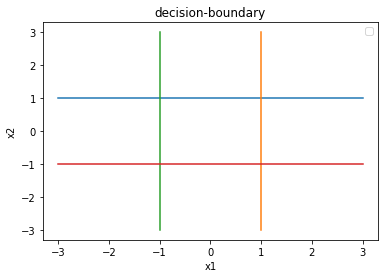

In [75]:
import matplotlib.pyplot as plt
x=np.linspace(-3,3,100)
x1=np.zeros(100)
x2=np.zeros(100)
x1[:]=1
x2[:]=-1
y=np.linspace(-3,3,100)
x3 = np.linspace(-3,3,100)
x4 = np.linspace(-3,3,100)
y3=np.ones(100)
y4=-np.ones(100)
plt.plot(x3,y3)# z2
plt.plot(x1,y)# z1直线
plt.plot(x2,y)# z3
plt.plot(x4,y4)#z4
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('decision-boundary')
plt.legend()

答案：决策边界是一个直线

### 输入一个2×4的矩阵，其中每一列代表一个(不同的)输入向量 ，每个向量位于第一个单位的决策边界上，也就是说， 。(有多种可能的答案。)

x_new=np.array([[1,1],[1,2],[1,3],[1,4]])

In [65]:
x_new=np.array([[1,1],[1,2],[1,3],[1,4]])
Z1_new = np.dot(x_new,W1)+W0
Z1_new

array([[ 0,  0, -2, -2]])

答案：上面的运行结果显示，当我们输入x_new时候，z的矩阵中第一列表示z1全为0，详细输入如下结果

In [64]:
np.array([[1,1],[1,2],[1,3],[1,4]])

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

#### 3.2C)考虑以下输入向量: 。输入矩阵，其中每列代表每个输入向量的隐藏单位 的输出。你可以使用你的决策边界图。


答案：代码和答案结果如下

In [72]:
x_new32c=np.array([[0.5,0.5],[0,2],[-3,0.5]])
Z_32=np.dot(x_new32c,W1)+W0
A_32=relu(Z_32)
A_32.T

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 2.],
       [0., 0., 0.]])

#### 3.3网络输出
在我们上面的网络中，具有两个softmax单元的输出层用于分类为两类之一。对于类别1，第一个单元的输出应该
大于另一个单元的输出，对于类别2，第二个单元的输出应该更大。这通过使用输出单元很好地推广到类。
(我们之前已经研究了使用带有sigmoid激活的单个输出单元解决两类分类问题；这是解决这些问题的另一种方
式。)
让我们来描述一下空间中的区域，其中这个网络的输出表示第一类(即$a_2^2$更大)或表示第二类(即$a_2^2$更大)。上一部分的图表在这里会很有用
在以下每种情况下，神经网络的输出值是多少？把你 的答案a写成表达式，你可以用，例如，e2 + 1的幂；指
数可以是负的，$e^{-2}$ + 1。


##### 3.3.A)$a_1^2 =?$

In [103]:
print(SM([0,2])[0])

0.11920292202211755


3.3.B)$a_2^2 =?$

In [104]:
print(SM([0,2])[1])

0.8807970779778824


#### 3.3.C)预测他是哪一类

答案：通过比较两个概率的大小，我们发现第二类的概率更大

#### 案例2：$f(z_1^1)+f(z_2^1)+f(z_3^1)+f(z_4^1)=1$

解析：因为这四个激活后的值和为1，有因为w权重的第二层每一列值都一样，所以
$$z_1^2=f(z_1^1)+f(z_2^1)+f(z_3^1)+f(z_4^1)+0=1$$
$$z_2^2=-f(z_1^1)-f(z_2^1)-f(z_3^1)-f(z_4^1)+2=1$$
所以我们得到z2=[1,1]

In [106]:
pp_33 =SM([1,1])

#### 3.3D)$a_1^2=?$

In [108]:
#这里就是第一个概率
print(pp_33[0])

0.5


3.3E)$a_2^2=?$

In [109]:
#第二个概率
print(pp_33[1])

0.5


#### 3.3F)预测为哪一类？

答案：预测为第一类/第二类（二者概率相同）

#### 案例3：$f(z_1^1)+f(z_2^1)+f(z_3^1)+f(z_4^1)=3$

解析：因为这四个激活后的值和为3，有因为w权重的第二层每一列值都一样，所以
$$z_1^2=f(z_1^1)+f(z_2^1)+f(z_3^1)+f(z_4^1)+0=3$$
$$z_2^2=-f(z_1^1)-f(z_2^1)-f(z_3^1)-f(z_4^1)+2=-1$$
所以我们得到z2=[3,-1]

In [110]:
ppp_new = SM([3,-1])

#### 3.3G)$a_1^2=?$

In [112]:
print(ppp_new[0])

0.9820137900379085


#### 3.3H)$a_2^2=?$

In [113]:
print(ppp_new[1])

0.01798620996209156


### 3.3I)预测为哪一类？

答案：这里预测为第一类